# Correlation Analysis :
- **Use Case:**
 - Use correlation analysis when you want to identify relationships between numerical features or between numerical features and the target variable.
 - Helpful for identifying redundant or highly correlated features.

- **Data Type:**
Designed for numerical features.
- **Considerations:**
 - Useful for understanding linear relationships but may not capture non-linear associations.

Feature Importance by Correlation:
target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)     0.426658
Name: target, dtype: float64


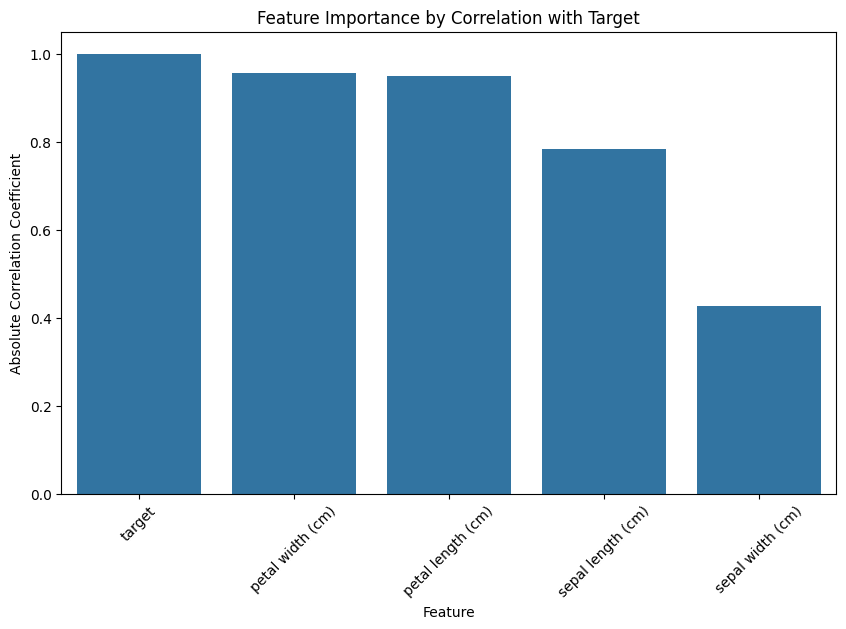

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
columns = iris.feature_names
df = pd.DataFrame(data=np.c_[X, y], columns=columns + ['target'])

# Calculate the absolute correlation coefficients between features and target
correlations = df.corr().abs()['target'].sort_values(ascending=False)

# Display the feature importance based on correlation
print("Feature Importance by Correlation:")
print(correlations)

# Visualize the correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.title('Feature Importance by Correlation with Target')
plt.xlabel('Feature')
plt.ylabel('Absolute Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()


# Univariate Feature Selection:

- **Use Case:**
 - Use univariate feature selection when you want to assess the individual impact of each feature on the target variable.
 - It's quick and straightforward, making it useful for identifying features with significant univariate relationships with the target.

- **Data Type:**
Works for both numerical and categorical features, depending on the chosen statistical test.

- **Considerations:**
 - Helpful for selecting features based on their individual performance without considering interactions among features.


#### F-test (for numerical features)

In [12]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply univariate feature selection using F-test
k_best = SelectKBest(score_func=f_classif, k=2)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a classifier on the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Display selected features
selected_features = np.array(iris.feature_names)[k_best.get_support()]
print("Selected Features:", selected_features)


Accuracy on the test set: 1.0
Selected Features: ['petal length (cm)' 'petal width (cm)']


#### chi-squared test (for categorical features)

In [5]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Create a categorical target variable for demonstration purposes
y_categorical = pd.cut(y, bins=[-1, 0, 1, 2, 3], labels=['Class 0', 'Class 1', 'Class 2', 'Class 3'], right=False)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.2, random_state=42)

# Apply univariate feature selection using chi-squared test
k_best = SelectKBest(score_func=chi2, k=2)
X_train_selected = k_best.fit_transform(X_train, y_train)
X_test_selected = k_best.transform(X_test)

# Train a classifier on the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_selected)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Display selected features
selected_features_indices = k_best.get_support(indices=True)
selected_features = np.array(iris.feature_names)[selected_features_indices]
print("Selected Features:", selected_features)


Accuracy on the test set: 1.0
Selected Features: ['petal length (cm)' 'petal width (cm)']


# Feature Importance from Models:

- **Use Case:**
 - Use feature importance from models when you want to leverage the intrinsic feature importance computed by certain models.

 - It's effective for gaining insights into the features that contribute most to model predictions.

- **Data Type:**
Depends on the model used; applicable for both numerical and categorical features.

- **Considerations:**
 - Commonly used in ensemble methods like Random Forest, where each feature's contribution to the overall model can be measured.


Feature Importance:
             Feature  Importance
2  petal length (cm)    0.439994
3   petal width (cm)    0.421522
0  sepal length (cm)    0.108098
1   sepal width (cm)    0.030387


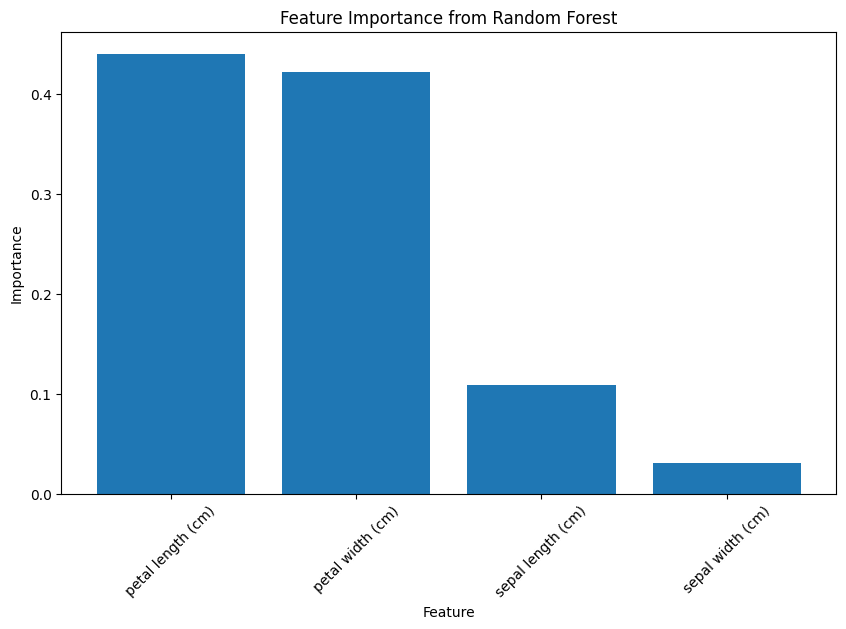

In [8]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': iris.feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importance
print("Feature Importance:")
print(feature_importance_df)

# Visualize the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.title('Feature Importance from Random Forest')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()


# Principal Component Analysis (PCA):

- **Use Case:**
 - Consider PCA when dealing with high-dimensional data and multicollinearity among features.
 - Use it for dimensionality reduction while preserving as much variance as possible.

- **Data Type:**
Primarily designed for numerical features.

- **Considerations:**
 - May result in a loss of interpretability as principal components are linear combinations of the original features.
 - Suitable for situations where reducing dimensionality is crucial, and the emphasis is on capturing overall patterns rather than individual feature importance.

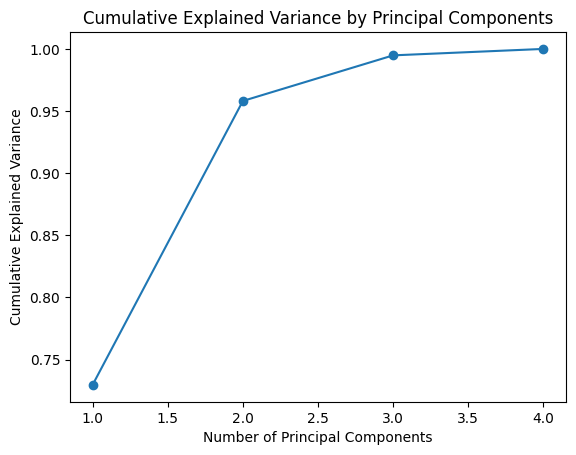

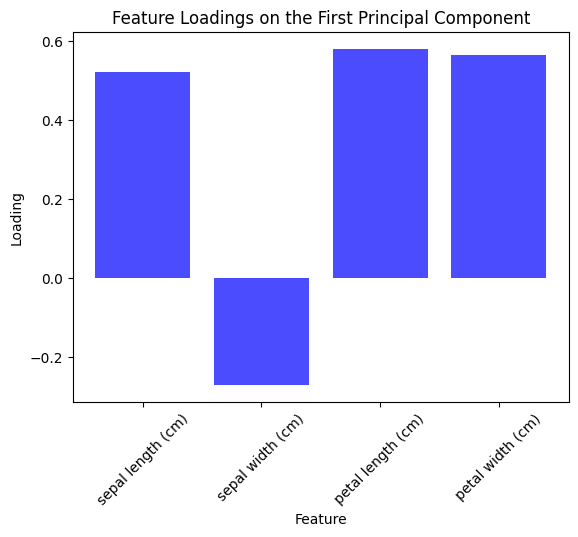

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Visualize the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Display the cumulative explained variance
cumulative_variance = np.cumsum(explained_variance_ratio)
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

# Visualize the loadings of each feature on the first principal component
feature_loadings = pca.components_[0]
feature_names = iris.feature_names

plt.bar(feature_names, feature_loadings, color='blue', alpha=0.7)
plt.title('Feature Loadings on the First Principal Component')
plt.xlabel('Feature')
plt.ylabel('Loading')
plt.xticks(rotation=45)
plt.show()


# Mutual Information:

- **Use Case:**
 - Use mutual information when you want to measure the dependency between features and the target variable, especially in the case of non-linear relationships.
 - It's effective when dealing with high-dimensional data or when the relationship between features and the target is not linear.

- **Data Type:**
Well-suited for both numerical and categorical features.

- **Considerations:**
 - Particularly useful when you suspect that the relationships between features and the target are more complex than linear correlations.


In [14]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset (or replace it with your own dataset)
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply univariate feature selection using mutual information
k_best = SelectKBest(score_func=mutual_info_classif, k=2)
X_train_mutual_info = k_best.fit_transform(X_train, y_train)
X_test_mutual_info = k_best.transform(X_test)

# Train a classifier on the selected features
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_mutual_info, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_mutual_info)

# Evaluate the classifier performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

# Display selected features
selected_features = np.array(iris.feature_names)[k_best.get_support()]
print("Selected Features:", selected_features)


Accuracy on the test set: 1.0
Selected Features: ['petal length (cm)' 'petal width (cm)']
